In [20]:
# pip install yfinance

In [21]:
import yfinance as yf

In [22]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [23]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GOOG']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'fc.yahoo.com\', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000018C534153C0>: Failed to resolve \'fc.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))


In [24]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [25]:
google_data.shape

(0, 6)

In [26]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes


In [28]:
google_data.isna().sum()

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

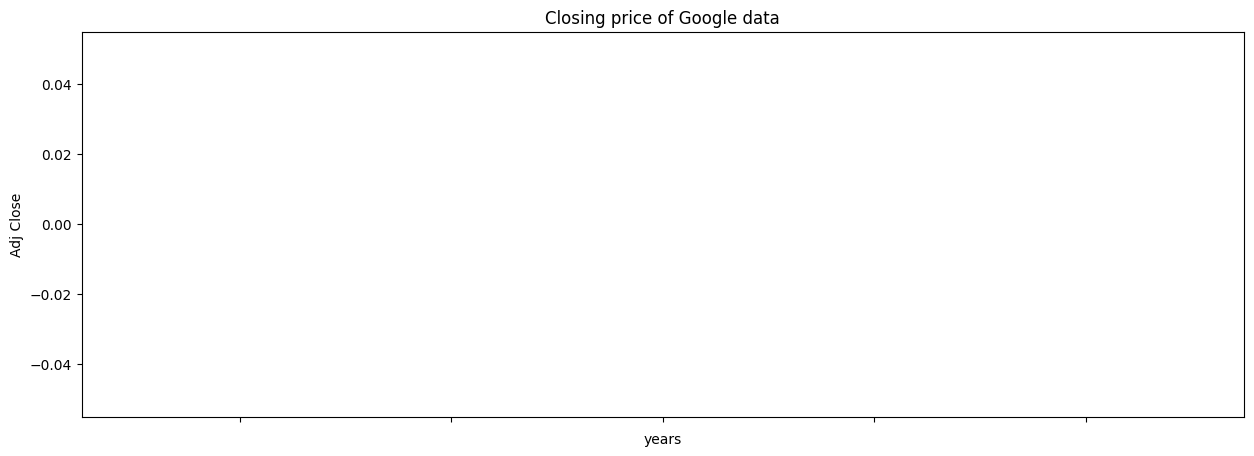

In [30]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [31]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [32]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

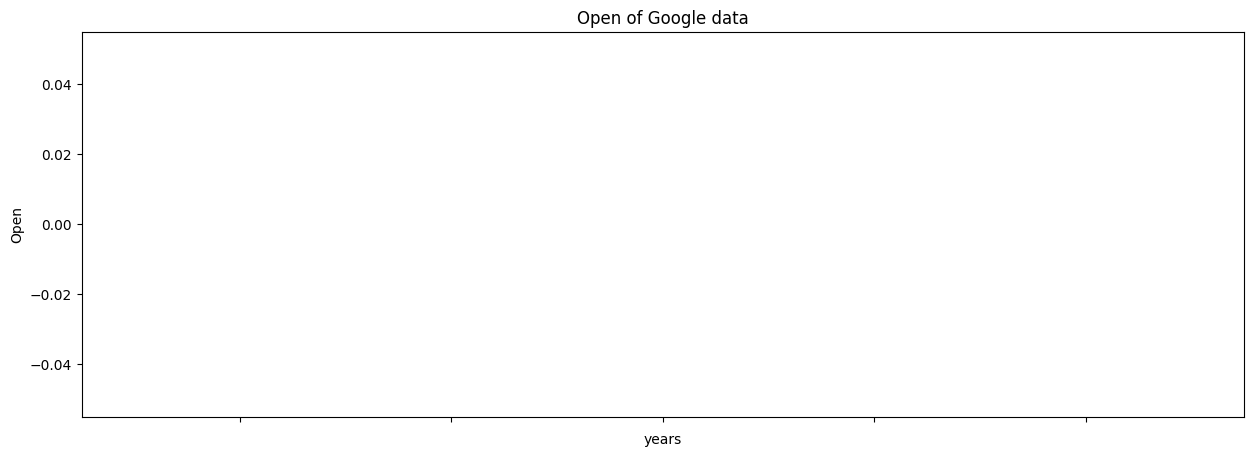

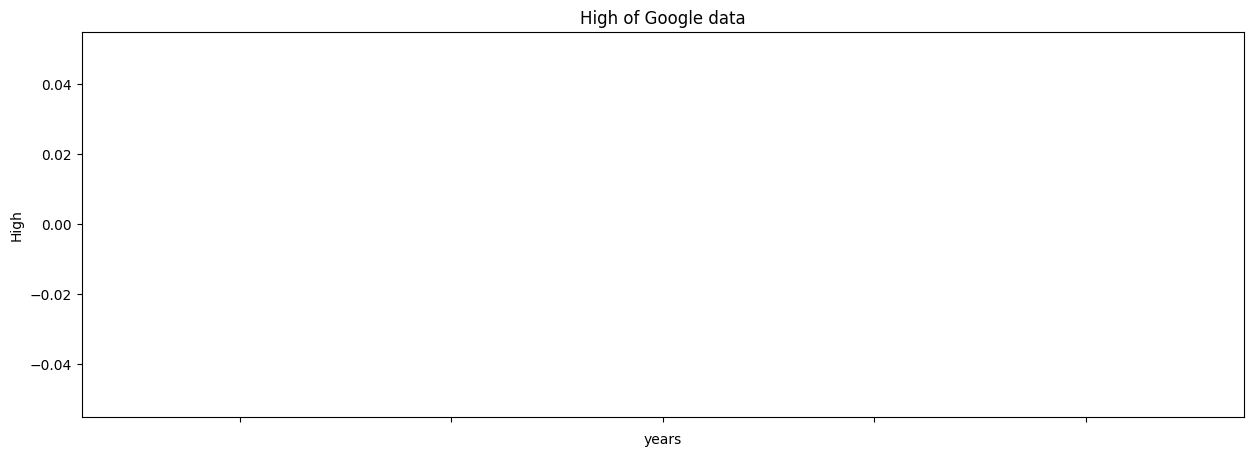

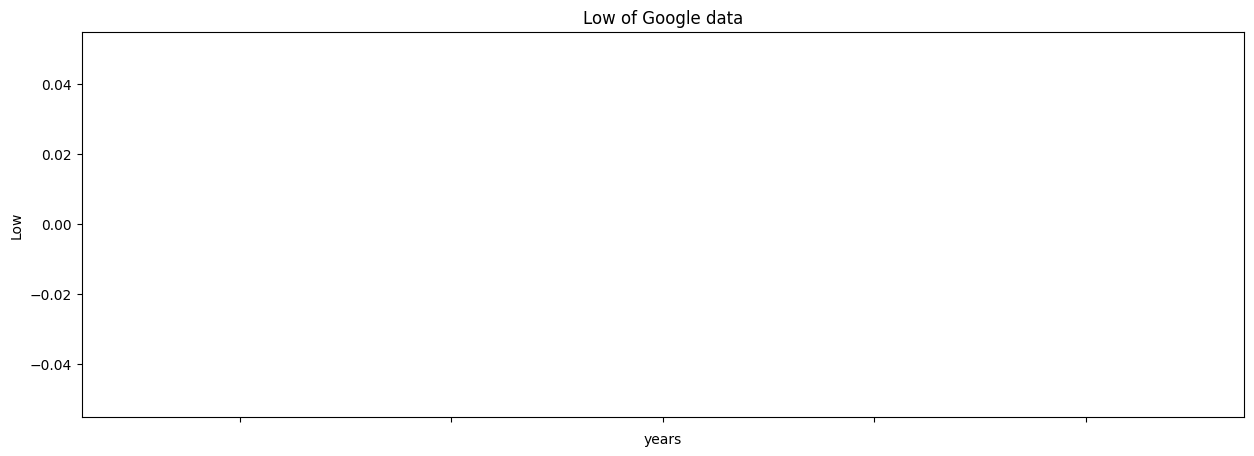

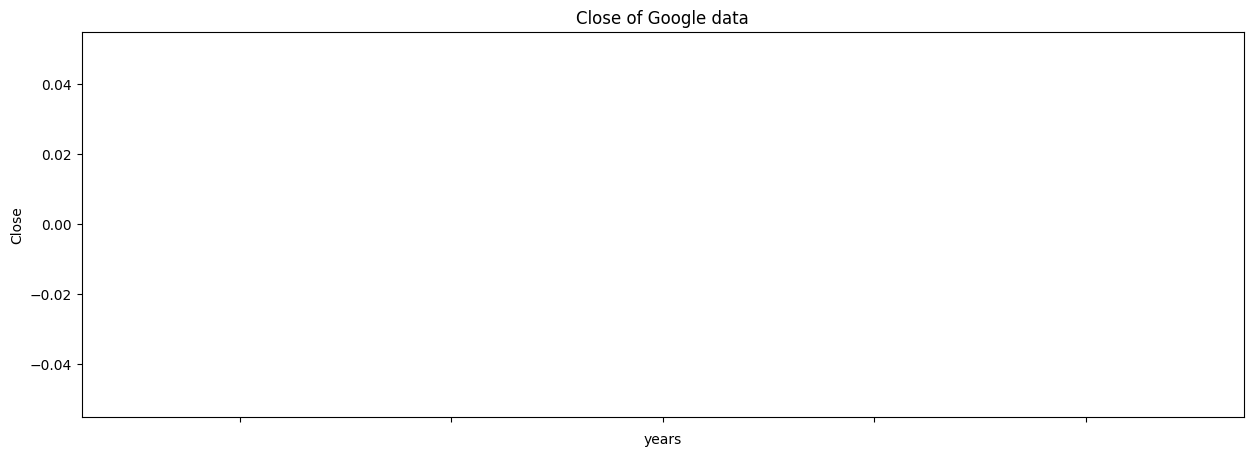

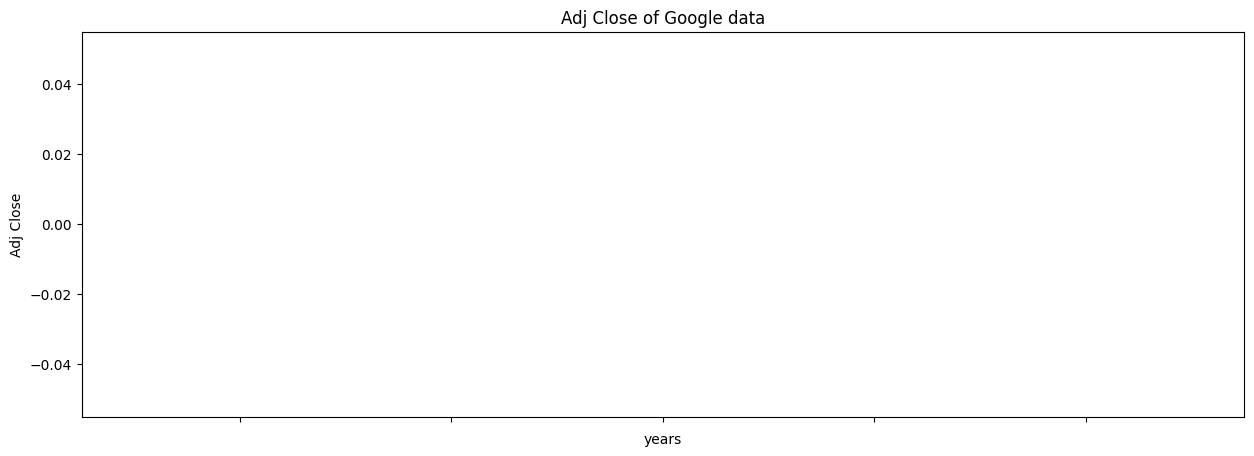

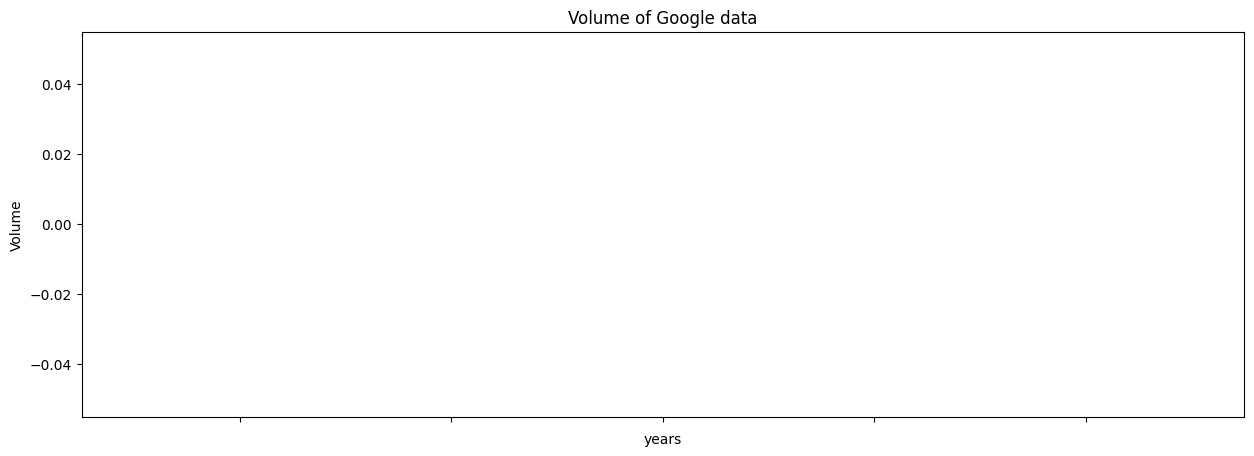

In [33]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [34]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [35]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [36]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [37]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [38]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

AttributeError: 'Index' object has no attribute 'year'

In [ ]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-10-21         NaN
2005-10-24         NaN
2005-10-25         NaN
2005-10-26         NaN
2005-10-27    5.924734
Name: MA_for_250_days, dtype: float64

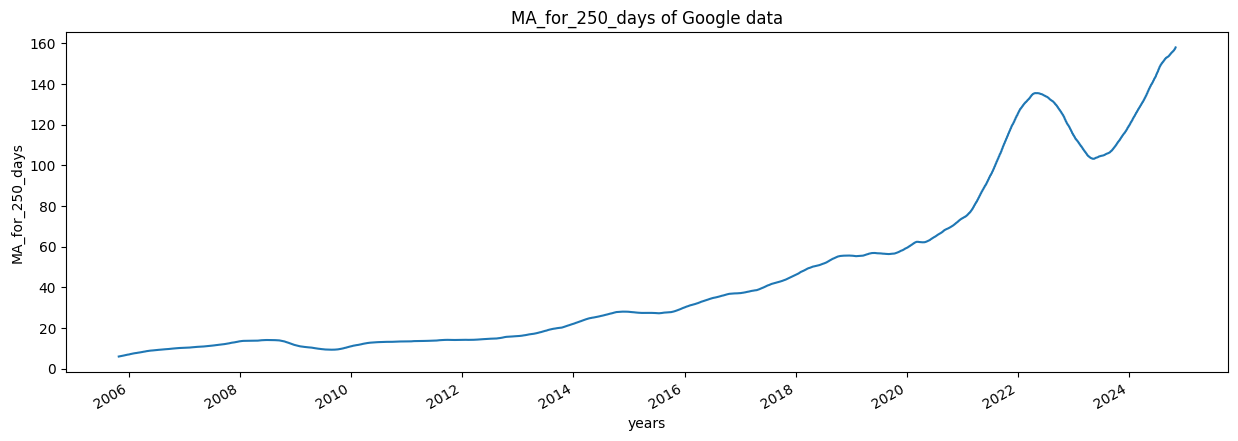

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

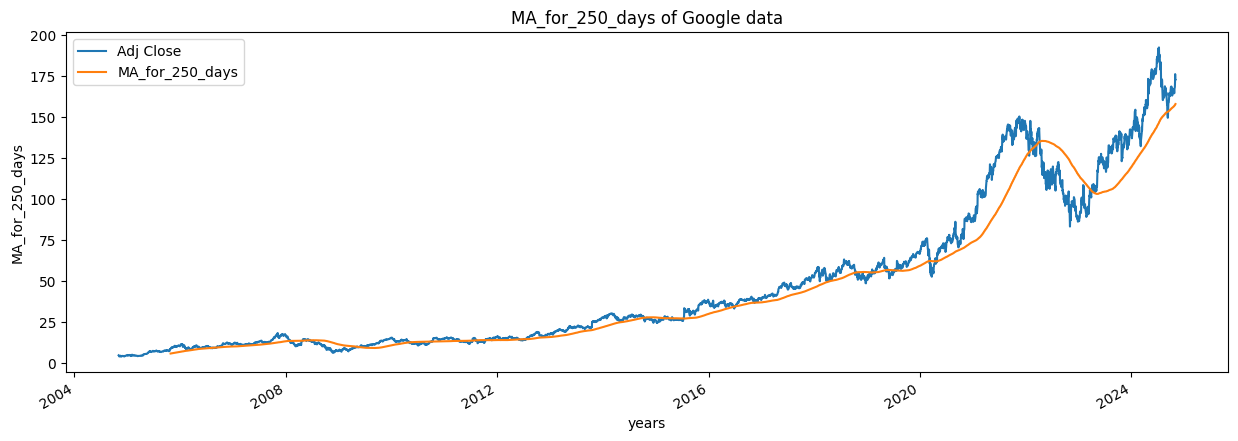

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

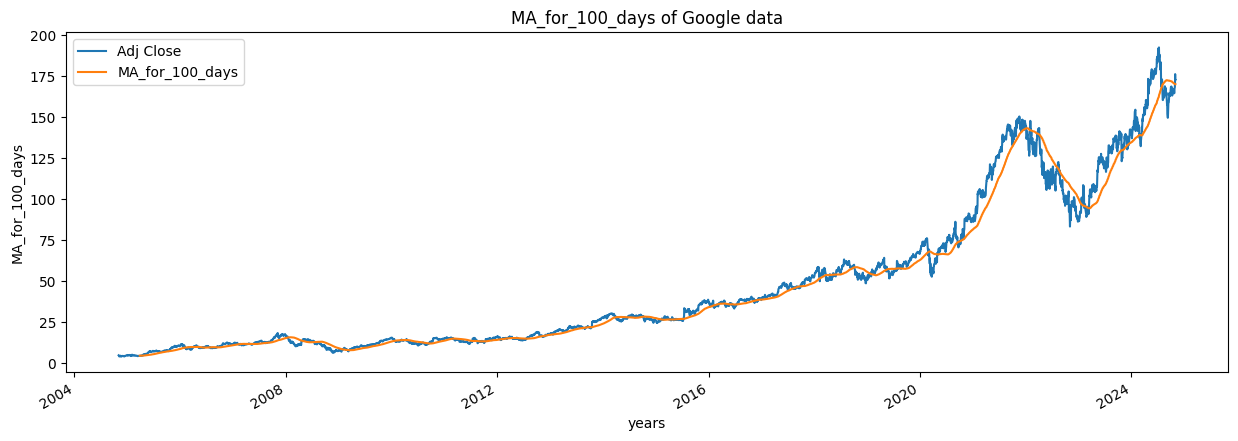

In [ ]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

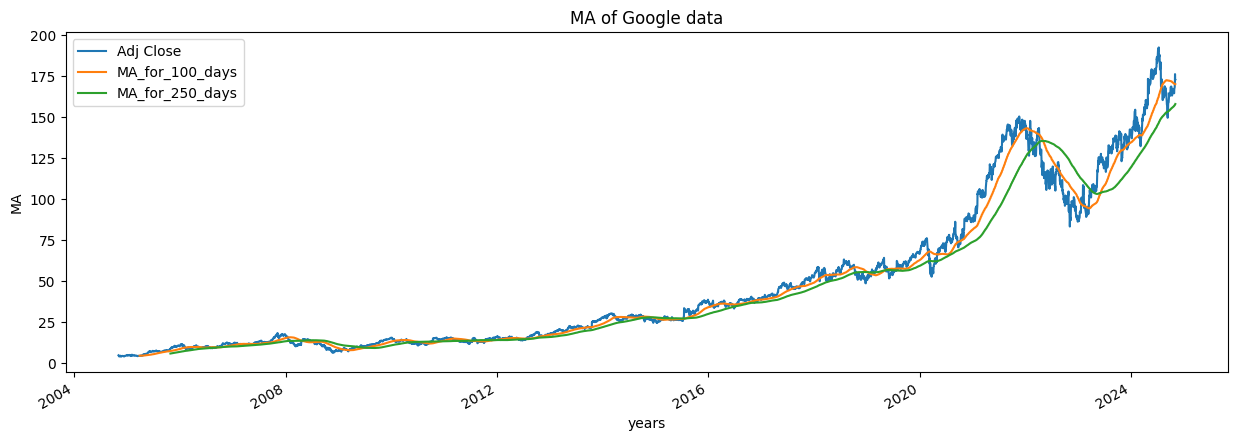

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [ ]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-11-02,4.841668,NaN
2004-11-03,4.762161,-0.016421
2004-11-04,4.588987,-0.036364
2004-11-05,4.207607,-0.083108
2004-11-08,4.287112,0.018896


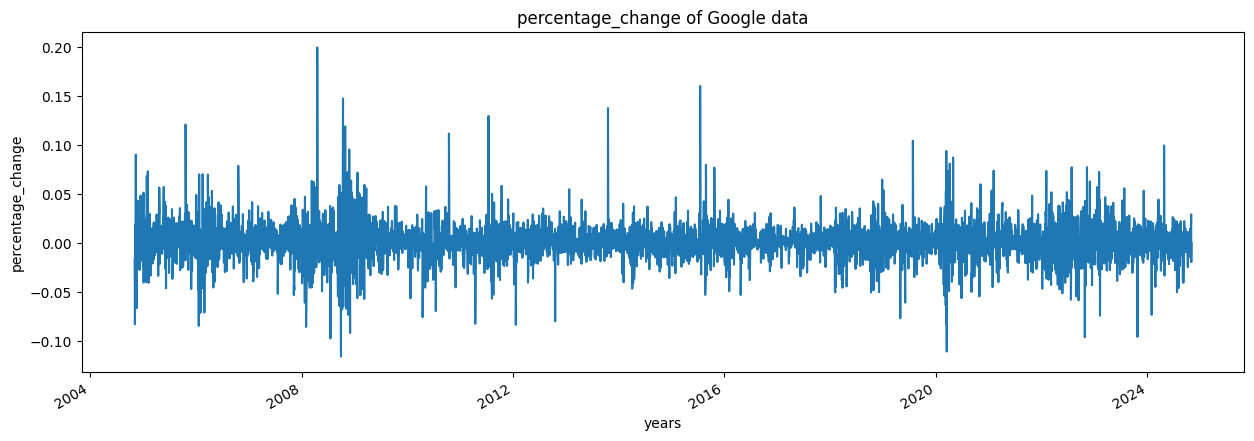

In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [ ]:
Adj_close_price = google_data[['Adj Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([4.10201311]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00392797],
       [0.00350574],
       [0.0025861 ],
       ...,
       [0.91361489],
       [0.89529353],
       [0.89508107]])

In [ ]:
len(scaled_data)

5035

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[0.00392797],
        [0.00350574],
        [0.0025861 ],
        [0.00056076],
        [0.00098298],
        [0.000475  ],
        [0.00036416],
        [0.00236443],
        [0.00222985],
        [0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127458],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0.00496241],
        [0.00387914],
        [0.00374852],
        [0

In [ ]:

int(len(x_data)*0.7)

3454

In [ ]:
4908-100-int(len(x_data)*0.7)

1354

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\manohar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 91s 26ms/step - loss: 2.4615e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 96s 28ms/step - loss: 5.2747e-05


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


In [ ]:
predictions

array([[0.26081413],
       [0.25844854],
       [0.25288472],
       ...,
       [0.8369462 ],
       [0.85497355],
       [0.85295314]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 53.214542],
       [ 52.769093],
       [ 51.721397],
       ...,
       [161.70291 ],
       [165.09755 ],
       [164.7171  ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.97735214],
       [ 50.70198441],
       [ 51.30949402],
       ...,
       [176.13999939],
       [172.69000244],
       [172.6499939 ]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

4.311045194317321

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-12-14,51.977352,53.214542
2018-12-17,50.701984,52.769093
2018-12-18,51.309494,51.721397
2018-12-19,51.025192,51.401138
2018-12-20,50.346859,51.285755


<Figure size 640x480 with 0 Axes>

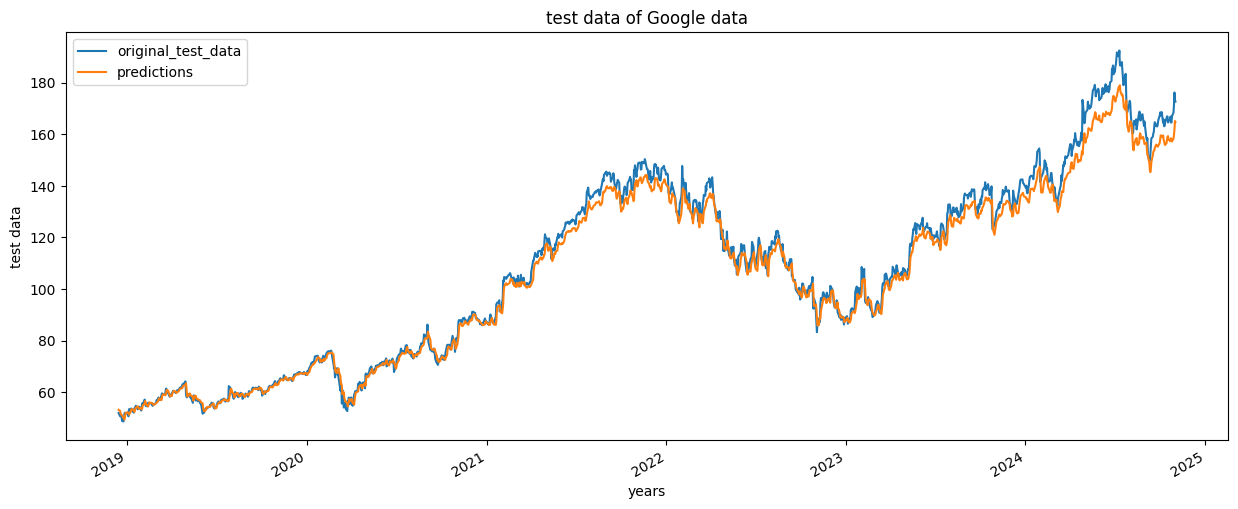

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

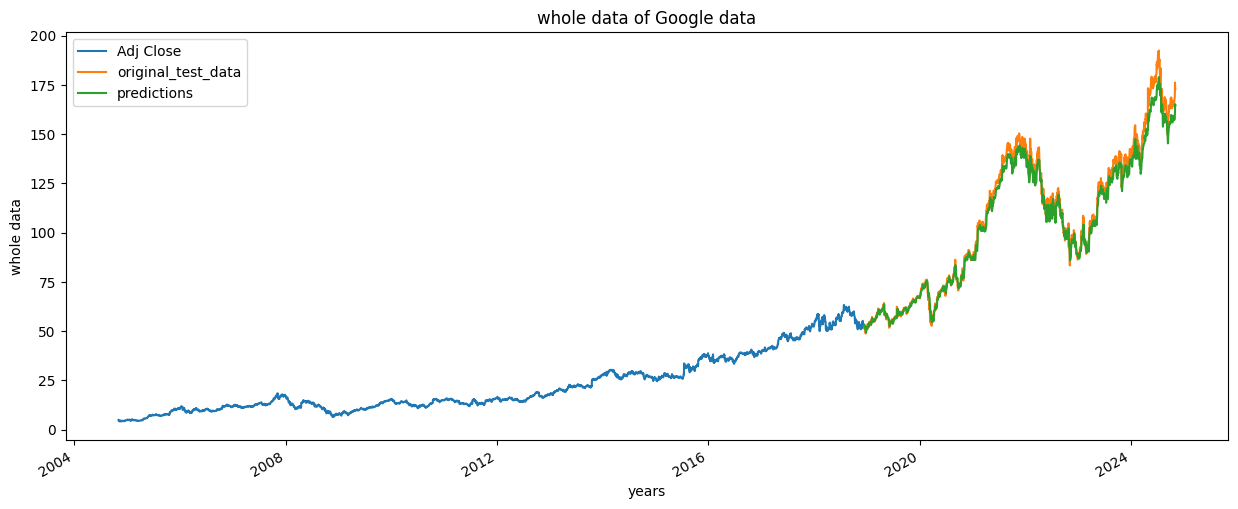

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")